In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from multislice import prop,prop_utils
from skimage.restoration import unwrap_phase

/home/sajid/miniconda3/envs/ipy3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f = h5py.File('solution.h5', 'r')
list(f.keys())

['sol_vec']

In [3]:
dset = f['sol_vec']
print(dset.shape)
dim_x,dim_y = int(np.sqrt(dset.shape[0]/2)),int(np.sqrt(dset.shape[0]/2))
print(dim_x,dim_y)

(2097152,)
1024 1024


In [4]:
data_ = np.zeros((dim_x*dim_y*2))
data  = np.zeros((dim_x,dim_y),dtype='complex')

In [5]:
dset.read_direct(data_, source_sel=np.s_[:], dest_sel=np.s_[:])
f.close()

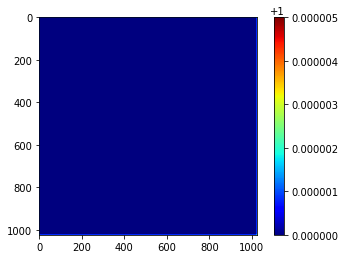

1.0000050000141003

In [6]:
wave_exit = (data_[:dim_x*dim_y]+1j*data_[dim_x*dim_y:]).reshape(dim_x,dim_y)
plt.clf()
plt.imshow(np.abs(wave_exit),cmap='jet')
plt.colorbar()
plt.show()
np.max(np.abs(wave_exit))

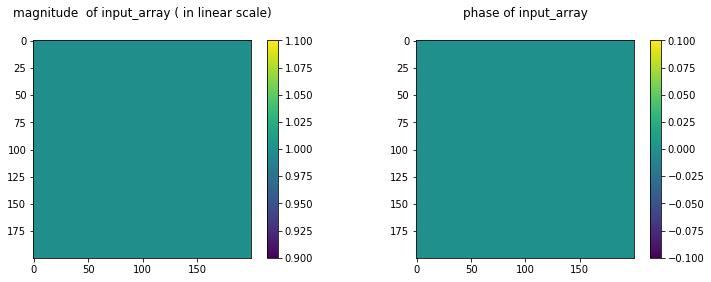

In [7]:
N = dim_x//2
n = 100
prop_utils.plot_2d_complex(wave_exit[N-n:N+n,N-n:N+n])

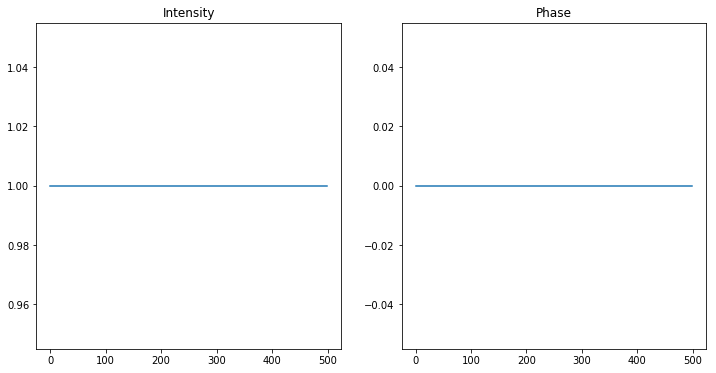

In [8]:
N = int(np.shape(wave_exit)[0]/2)
n = 250
plt.rcParams["figure.figsize"] = (12,6)
f,(ax1,ax2) = plt.subplots(1,2)
ax1.plot((np.abs(wave_exit[N-n:N+n,N])**2))
ax1.set_title("Intensity")
ax2.plot(unwrap_phase(np.angle(wave_exit[N-n:N+n,N])))
ax2.set_title("Phase")
plt.show()
plt.rcParams["figure.figsize"] = (6,4)

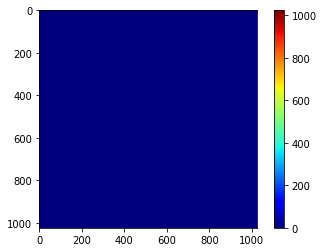

1.0000050000141003


In [9]:
wave_far_field = np.fft.fftshift(np.fft.fft2(wave_exit,norm="ortho"))
plt.imshow(np.abs(wave_far_field),cmap='jet')
plt.colorbar()
plt.show()
print(np.max(np.abs(wave_exit)))

In [10]:
def get_first_lobe(foc_spot,loc,width,plot=0):
    cx,cy = np.round(np.where(foc_spot==np.max(foc_spot)))
    nr,nc = np.shape(foc_spot)
    r = np.arange(nr)-cx 
    c = np.arange(nc)-cy 
    [R,C] = np.meshgrid(r,c)
    index = np.round(np.sqrt(R**2+C**2))+1 
    primary_lobe = 0
    temp = np.max(foc_spot)

    for i in np.arange(-width,width):
        j = i + loc
        primary_lobe+=np.sum(foc_spot[np.where(index==j)])
        
    if plot==1 :
        plt.imshow(np.log10(foc_spot),alpha=0.5,cmap='jet')
        plt.colorbar()
        for i in np.arange(-width,width):
            j = i + loc
            R1,C1 = np.where(index==j)
            plt.scatter(C1,R1,s=5,alpha = 0.25)
        plt.show()
    return primary_lobe

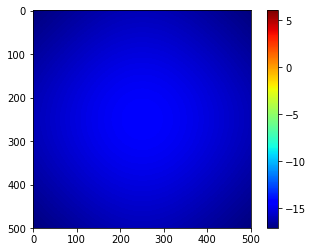

In [11]:
N = dim_x//2
n = 250
plt.imshow(np.log10(np.abs(wave_far_field**2))[N-n:N+n,N-n:N+n],cmap='jet')
plt.colorbar()
plt.show()

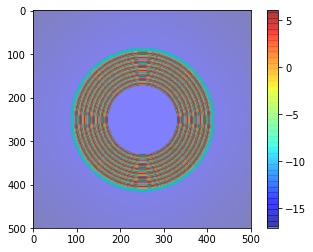

eff : 3.148921867405733e-14
eff : 6.2573662887141774e-12


In [12]:
N = dim_x//2
n = 250
foc_spot = np.abs(wave_far_field**2)[N-n:N+n,N-n:N+n]
first_lobe = get_first_lobe(foc_spot,124,40,plot=1)
print("eff :",first_lobe/np.sum(np.abs(wave_far_field**2)))
print("eff :",100 * (first_lobe/np.sum(np.abs(wave_far_field**2)))*(2.44e-9*2048)**2/(np.pi*(100*20e-9)**2))